In [9]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
model = KMeans(n_clusters=3)

In [24]:
model.fit(iris['data'])

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
y_labels = model.predict(iris['data'])
print(y_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [26]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
new_samples = [
    [5.7, 4.4, 1.5, 0.4],
    [6.5, 3.0, 5.5, 1.8],
    [5.8, 2.7, 5.1, 1.9],
    [5.6, 4.3, 1.4, 0.4],
]

In [16]:
import pandas as pd
df = pd.DataFrame(new_samples, columns = iris.feature_names)

In [17]:
df['target'] = new_labels

NameError: name 'new_labels' is not defined

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,4.4,1.5,0.4,1
1,6.5,3.0,5.5,1.8,2
2,5.8,2.7,5.1,1.9,0
3,5.6,4.3,1.4,0.4,1


In [ ]:
df[df['target']==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,4.4,1.5,0.4,1
3,5.6,4.3,1.4,0.4,1


In [ ]:
new_labels = model.predict(new_samples)

In [ ]:
new_labels

array([1, 2, 0], dtype=int32)

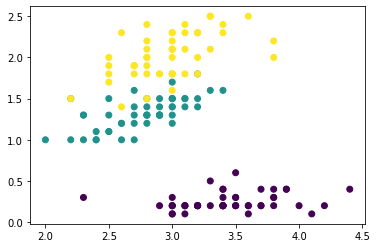

In [ ]:
X = iris['data'][:,1]
y = iris['data'][:,3]
plt.scatter(X, y, c=iris['target'])
plt.show()

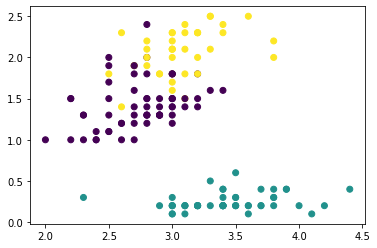

In [ ]:
xs = iris['data'][:,1]
ys = iris['data'][:,3]
plt.scatter(xs, ys, c=y_labels)
plt.show()

## Evaluating Clustering

In [18]:
import pandas as pd

In [30]:
def map_species(row):
    if row['labels'] == 0:
        return 'setosa'
    elif row['labels'] == 1:
        return 'versicolor'
    elif row['labels'] == 2:
        return 'virginica'
    else:
        return None

In [31]:
df = pd.DataFrame({'labels': iris.target})
df

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [32]:
df['species'] = df.apply(map_species, axis=1)

In [33]:
df

,labels,species
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [34]:
ct = pd.crosstab(df['labels'], df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,50,0
2,0,0,50


In [35]:
df_pred = pd.DataFrame({'labels': y_labels})
df_pred['species'] = df_pred.apply(map_species, axis=1)

In [37]:
ct_pred = pd.crosstab(df_pred['labels'], df_pred['species'])
ct_pred

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,62,0
2,0,0,38


In [ ]:
iris.target_names

## Inertia measure clustering quality

In [38]:
model.fit(iris['data'])
model.inertia_

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


78.85144142614601

In [39]:
y_labels2 = model.predict(iris['data'])
print(y_labels2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [40]:
inertia_value = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(iris['data'])
    inertia_value.append(model.inertia_)
inertia_value

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.345910714285715,
 46.44618205128205,
 39.03998724608725,
 34.692790475083314,
 29.988943950786055,
 28.247948051948054,
 26.14451931789289]

In [41]:
import numpy as np

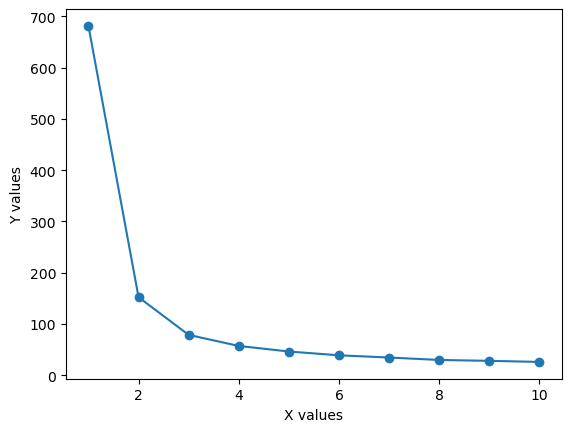

In [42]:
x_values = range(1, len(inertia_value)+1)

# Create a figure and axis object
fig, ax = plt.subplots()
ax.plot(x_values, inertia_value, '-o')
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
plt.show()

## Transforming Features for better clustering

In [44]:
samples = pd.read_csv('wine.csv')

In [45]:
model = KMeans(n_clusters=3)
label = model.fit_predict(samples)

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
def map_varieties(row):
    if row['labels'] == 0:
        return 'Barbera'
    elif row['labels'] == 1:
        return 'Barolo'
    elif row['labels'] == 2:
        return 'Grignolino'
    else:
        return None

In [47]:
df_wine = pd.DataFrame({'labels': label})
df_wine['varieties'] = df_wine.apply(map_varieties, axis=1)
wine_ct = pd.crosstab(df_wine['labels'], df_wine['varieties'])
wine_ct

varieties,Barbera,Barolo,Grignolino
labels,,,
0,62,0,0
1,0,46,0
2,0,0,69


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

In [51]:
from sklearn.pipeline import make_pipeline

In [53]:
pipeline = make_pipeline(scaler, model)
pipeline.fit(samples)

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [54]:
labels = pipeline.predict(samples)

In [58]:
df_wine = pd.DataFrame({'labels': labels})
df_wine['varieties'] = df_wine.apply(map_varieties, axis=1)
wine_ct = pd.crosstab(df_wine['labels'], df_wine['varieties'])
wine_ct

varieties,Barbera,Barolo,Grignolino
labels,,,
0,60,0,0
1,0,68,0
2,0,0,49


## Visualising Hierachies

In [63]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram 

In [66]:
df_euro = pd.read_excel('ESC-2016-grand_final-full_results.xlsx', header=1)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [67]:
df_euro

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,\n,\n
1,Albania,Czech Republic,21,15,25,23,16,22,22,\n,\n
2,Albania,The Netherlands,22,14,23,24,21,24,24,\n,\n
3,Albania,Azerbaijan,19,12,11,21,11,13,19,\n,\n
4,Albania,Hungary,8,13,9,14,9,10,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10,5
1062,United Kingdom,Malta,18,13,8,17,4,12,15,\n,\n
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12,\n
1064,United Kingdom,Austria,23,15,12,18,13,17,13,\n,\n


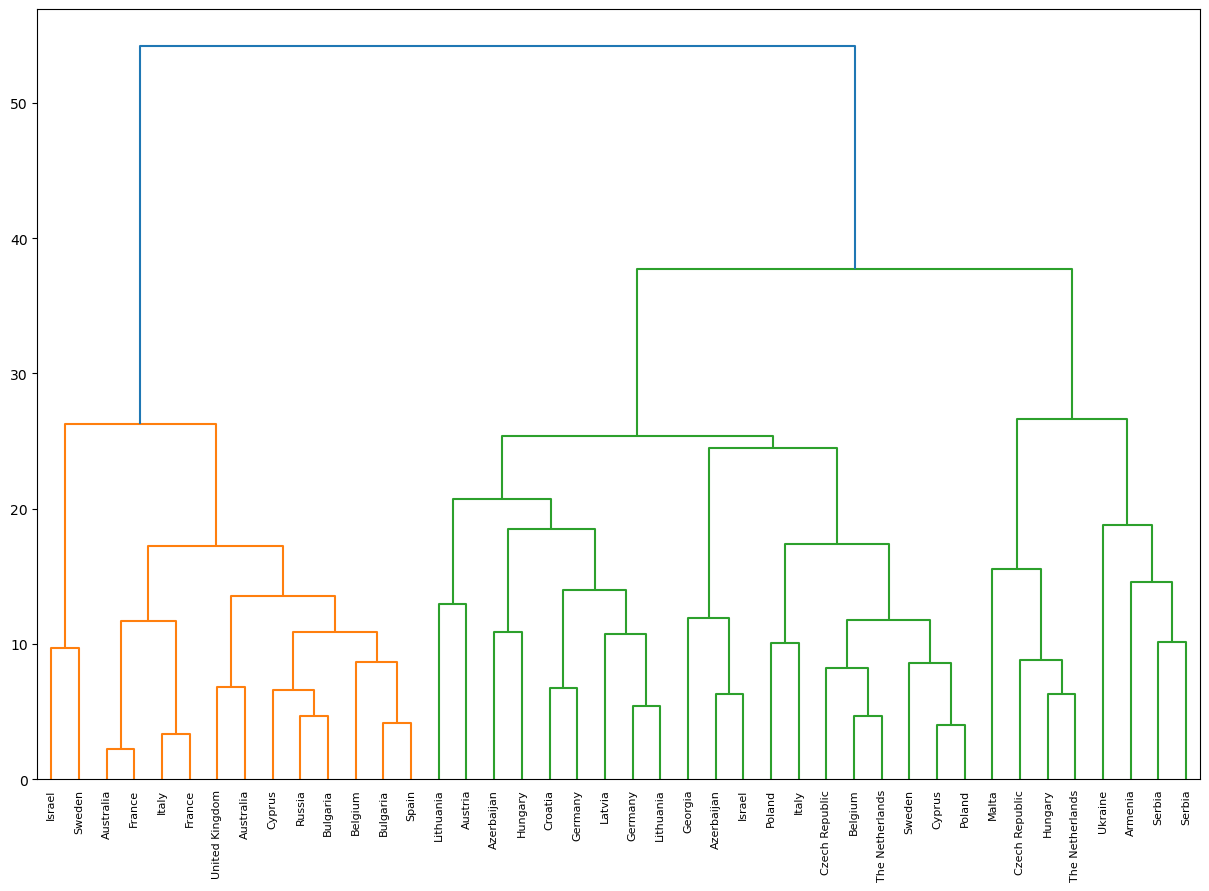

In [68]:
samples= df_euro.iloc[:, 2:7].values[:42]
country_names= list(df_euro.iloc[:, 1].values[:42])

mergings = linkage(samples, method='complete')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 10))
fig  = dendrogram(mergings, labels=country_names)
plt.show()

In [70]:
from scipy.cluster.hierarchy import fcluster

In [71]:
mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 15, criterion='distance')
labels

array([ 9,  9,  9,  5, 10,  2,  1,  3,  1,  6,  2,  8,  2,  9, 12,  4,  6,
        3,  3,  6, 13, 11,  7,  4,  3, 12,  3, 10, 10,  7,  5,  8,  7,  3,
        9,  6,  2,  9,  3,  3, 12,  6], dtype=int32)

In [72]:
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
pairs.sort_values('labels')

,labels,countries
6,1,Israel
8,1,Sweden
36,2,France
12,2,Australia
10,2,France
5,2,Italy
24,3,United Kingdom
33,3,Bulgaria
17,3,Russia
18,3,Spain


## T-SNE for 2-Dimensional Maps

In [73]:
from sklearn.manifold import TSNE

In [74]:
samples = iris.data
species = iris.target

In [75]:
samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [99]:
model = TSNE(n_components=3, learning_rate=100)
transformed = model.fit_transform(samples)

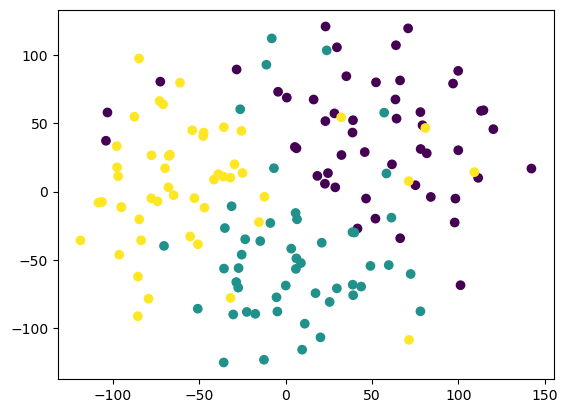

In [88]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

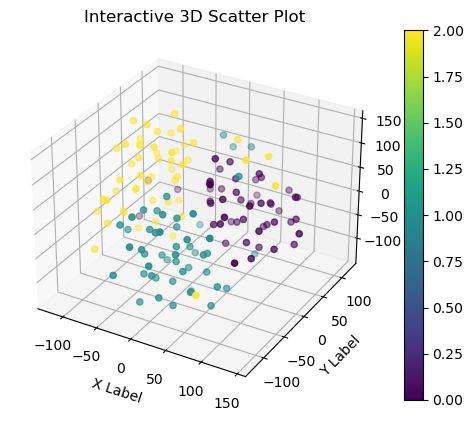

In [104]:
# Create the figure and axis objects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = transformed[:,0]
y = transformed[:,1]
z = transformed[:,2]
# Create the scatter plot
scatter = ax.scatter(x, y, z, c=species)

# Add labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Interactive 3D Scatter Plot')

# Add a color bar
fig.colorbar(scatter)

# Add interactivity
def on_click(event):
    # Get the x and y coordinates of the mouse click
    xclick, yclick = event.xdata, event.ydata
    # Calculate the distance between the clicked point and each point in the data
    distances = np.sqrt((x - xclick)**2 + (y - yclick)**2)
    # Find the index of the closest point
    closest_index = np.argmin(distances)
    # Get the z value of the closest point
    closest_z = z[closest_index]
    # Update the color of the scatter plot to highlight the closest point
    scatter.set_array(z)
    scatter.set_color(plt.cm.viridis(closest_z))

# Connect the on_click function to the figure
fig.canvas.mpl_connect('button_press_event', on_click)

# Show the plot
plt.show()


In [103]:
@interact(xclick=(0, 1, 0.1), yclick=(0, 1, 0.1))
def create_plot(xclick=0.5, yclick=0.5):
    # Generate some random data
    x = transformed[:,0]
    y = transformed[:,1]
    z = transformed[:,2]

    # Create the figure and axis objects
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create the scatter plot
    scatter = ax.scatter(x, y, z, c=z)

    # Add labels and title
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('Interactive 3D Scatter Plot')

    # Add a color bar
    fig.colorbar(scatter)

    # Add interactivity
    # Calculate the distance between the clicked point and each point in the data
    distances = np.sqrt((x - xclick)**2 + (y - yclick)**2)
    # Find the index of the closest point
    closest_index = np.argmin(distances)
    # Get the z value of the closest point
    closest_z = z[closest_index]
    # Update the color of the scatter plot to highlight the closest point
    scatter.set_array(z)
    scatter.set_color(plt.cm.viridis(closest_z))

    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='xclick', max=1.0), FloatSlider(value=0.5, descriptio…